In [70]:
from gsmmutils import ModelValidator, MyModel
import gsmmutils
gsmmutils.model.model_validator.DATA_PATH =  "../results"
import seaborn as sns
from gsmmutils import DATA_PATH
gsmmutils.DATA_PATH = r"C:\Users\Bisbii\PythonProjects\GSMMutils\data"
from os.path import join
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(35,8.27)})

In [101]:
ng = MyModel(join(DATA_PATH, 'models/model_ng.xml'), 'e_Biomass__cytop')
ng.set_prism_reaction("PRISM_solar_litho__extr")
print(ng.slim_optimize())
ds = MyModel(join(DATA_PATH, 'models/model_ds.xml'), 'e_Biomass__cytop')
ds.set_prism_reaction("PRISM_white_LED__extr")
print(ds.slim_optimize())
pl = MyModel(join(DATA_PATH, 'models/model_pl.xml'), 'e_Biomass__cytop')
pl.set_prism_reaction("PRISM_fluorescent_cool_215W__extr")
print(pl.slim_optimize())

Loading

Reactions: 4498
Metabolites: 3799
Genes: 1332
Model loaded
0.021383004132942363
Loading

Reactions: 4510
Metabolites: 3668
Genes: 1696
Model loaded
0.19376008818033733
Loading

Reactions: 4771
Metabolites: 4216
Genes: 1350
Model loaded
0.13531697467297749


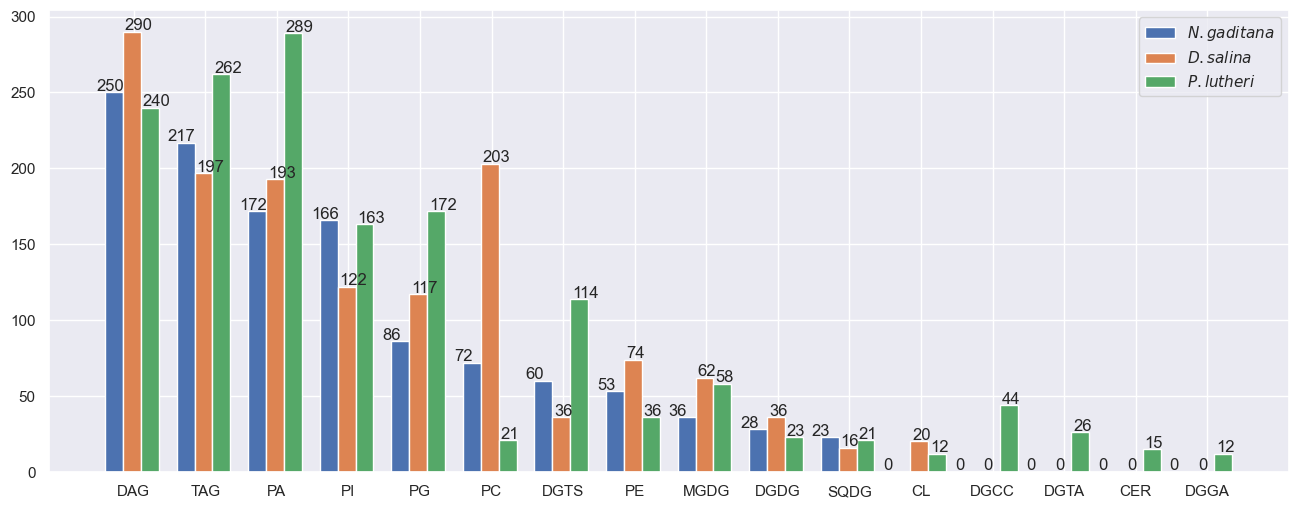

In [102]:
lipids_ng = {k: len(v) for k, v in ng.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids_ds = {k: len(v) for k, v in ds.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids_pl = {k: len(v) for k, v in pl.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids = {k: (lipids_ng.get(k, 0), lipids_ds.get(k, 0), lipids_pl.get(k, 0)) for k in set(lipids_ng.keys()).union(set(lipids_ds.keys())).union(set(lipids_pl.keys()))}
from collections import OrderedDict
ordered_dict = OrderedDict(sorted(lipids.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(16, 6))
width = 0.25
x = range(len(ordered_dict))
plt.bar(x, [v[0] for v in ordered_dict.values()], width, label=r"$\it{N. gaditana}$")
plt.bar([i + width for i in x], [v[1] for v in ordered_dict.values()], width, label=r"$\it{D. salina}$")
plt.bar([i + width * 2 for i in x], [v[2] for v in ordered_dict.values()], width, label=r"$\it{P. lutheri}$")
plt.xticks([i + width / 2 for i in x], ordered_dict.keys(), rotation=90)
plt.legend()
for i, v in enumerate(ordered_dict.values()):
    plt.text(i - 0.25, v[0] + 1, str(v[0]))
    plt.text(i + width - 0.1, v[1] + 1, str(v[1]))
    plt.text(i + width * 2 - 0.1, v[2] + 1, str(v[2]))
    
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label.replace('BOIMMG (', '') for label in labels]
labels = [label.replace(')', '') for label in labels]
x_ticks_positions = plt.gca().get_xticks()
x_ticks_positions = [e+0.15 for e in x_ticks_positions]
plt.gca().set_xticks(x_ticks_positions, labels, rotation=0)
plt.savefig("../results/figures/reactions_per_lipid_pathway.png")